# CSCI 5454: Assignment 4

Your Name: Shipra Behera


Collaborated With:


## Problem 1 (20 points)

We will now consider a scheme to randomly permute an array of size $n$. You are allowed to generate a single random bit at a time using the `random.getrandbits(1)` function. Write a function `shuffleArray` that will shuffle an input array of $n$ integers so that any permutation is equally probable.

- __Input:__ original list.
- __Return:__ shuffled list.


Note that you may modify the original array in place, if you wish but the function shuffleArray must return an array even if it happens to be the original array. You are __forbidden__ to use any random number generator other than `random.getrandbits(1)`.


In [47]:
from random import getrandbits
from math import log


## Input to your code is a list of numbers -- assume all input numbers are unique
## Output should also be a list.
## You can modify the input array if you wish.
def shuffleArray(a): 
    if (len(a) <= 1):
        return a
    first = []
    second = []
    for i in a:
        if getrandbits(1):
            first.append(i)
        else:
            second.append(i)
    return shuffleArray(first) + shuffleArray(second)
    

## Brief Explanation of Your Approach

__Please explain in 10 lines or less what you did. A bullet point by point explanation that is easier to read is appreciated. To be sure, explanations that are unclear or overly lengthy will not be accepted__



*My original approach was to create a new array, and insert elements at beginning or end depending on the value of getrandbits(1). This introduced a bias for the last element, as it would always be inserted somewhere in the middle of the new array. Morever, this generated more or less similar permuation for multiple shufflings of the array, which was not a uniform distribution.* <br/><br/>
I modified this approach as follows: <br/>
1. Partition the array into two halves, depending on the value of getrandbits(1). <br/>
2. Partition each half recursively, until it reaches just one element (this is the base case). <br/>
3. Merge the two halves and return. <br/>
4. This ensures that each element is shuffled multiple times and can end up on either side of the partition with equal probability (1/2), hence there would be no bias and each element would be uniformly distributed across the array in each run. <br/>


### Autograding your answer: do read.

The problem above is very interesting because it is not clear how to test whether your solution works. 
We have to warn you that this is very hard. There are many things to test and we converged upon testing
two aspects of your solution. We will  input a list  of elements `[0, 1, 2, 3, 4, ... , n-1 ]` and each run 
of your algorithm should produce a potentially new random shuffle. Across many runs of the algorithm, we look for 
two different statistics: 

- Take a given element: say element number 10. We can find where it ended up in the shuffled array. This must be a uniform distribution over 0...(n-1)

- Take a given position in the shuffled array. We can find what element is at this position. This must also be a uniform distribution over 0...(n-1)


Thus we can test how uniform the distributions look for both types of tests by two means: (a) visually through a histogram and (b) using a Pearson's $\chi^2$ (chi-squared) test https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

(a) is not going to be a good solution. However, (b) is a better approach. 

Note that the null hypothesis of chi-squared test is that the distribution is uniform. However, the chi-squared test cannot confirm the null hypothesis, it can only say that the data serves to reject the null or the data fails to reject the null hypothesis. However, it cannot say that the data supports the null hypothesis. This is a subtle point, that is often misunderstood. Therefore, it is possible that in the many runs, you may get the occasional message "_chi-squared test fails_". However, if you get that message on the majority of the tests, you may have a mistake.

__For your convenience, we have kept the original output that the testing script produced on our own solution. It will be overwritten once you run the script on your solution__



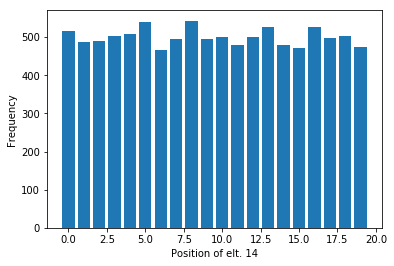

Expected value:  500.0
Chi Squared value = 17.988000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.523240 with test stat value = 17.988000
Chi squared test passed


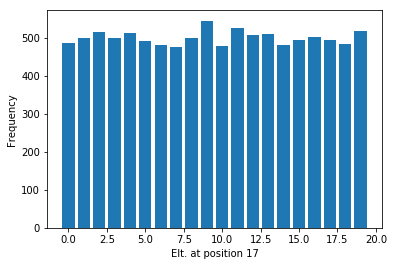

Chi Squared value = 12.076000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.882351 with test stat value = 12.076000
Chi squared test passed


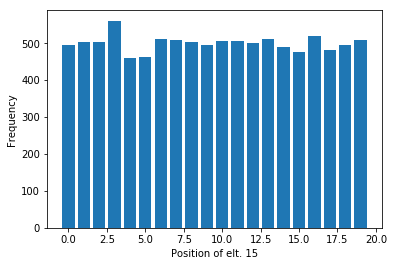

Expected value:  500.0
Chi Squared value = 17.376000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.564411 with test stat value = 17.376000
Chi squared test passed


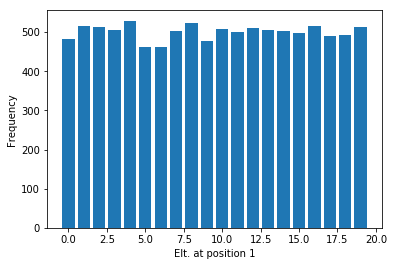

Chi Squared value = 12.672000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.854931 with test stat value = 12.672000
Chi squared test passed


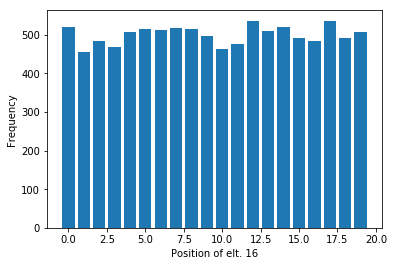

Expected value:  500.0
Chi Squared value = 20.336000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.374620 with test stat value = 20.336000
Chi squared test passed


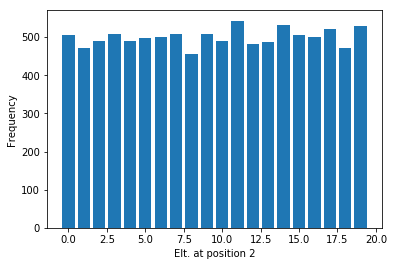

Chi Squared value = 17.064000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.585532 with test stat value = 17.064000
Chi squared test passed


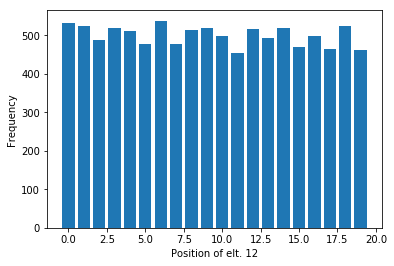

Expected value:  500.0
Chi Squared value = 25.076000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.158056 with test stat value = 25.076000
Chi squared test passed


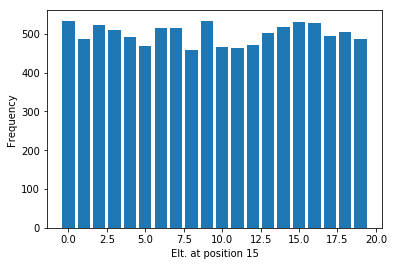

Chi Squared value = 23.828000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.202833 with test stat value = 23.828000
Chi squared test passed


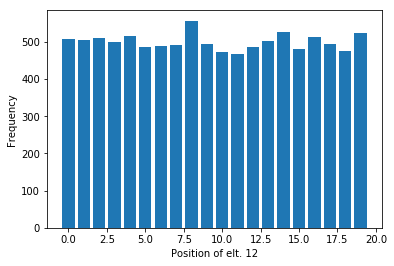

Expected value:  500.0
Chi Squared value = 16.868000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.598810 with test stat value = 16.868000
Chi squared test passed


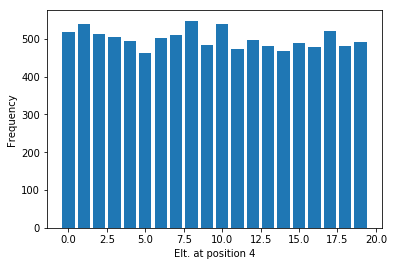

Chi Squared value = 22.040000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.282270 with test stat value = 22.040000
Chi squared test passed


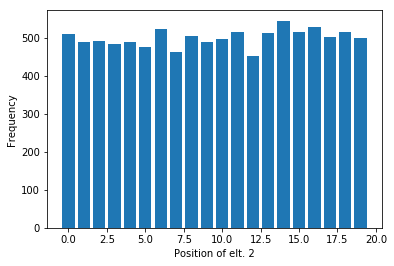

Expected value:  500.0
Chi Squared value = 18.836000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.467401 with test stat value = 18.836000
Chi squared test passed


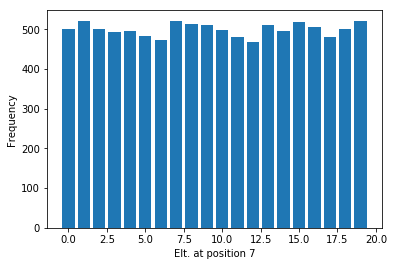

Chi Squared value = 10.024000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.952351 with test stat value = 10.024000
Chi squared test passed


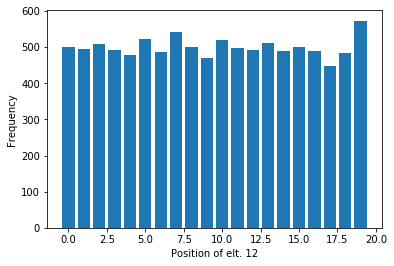

Expected value:  500.0
Chi Squared value = 26.108000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.127208 with test stat value = 26.108000
Chi squared test passed


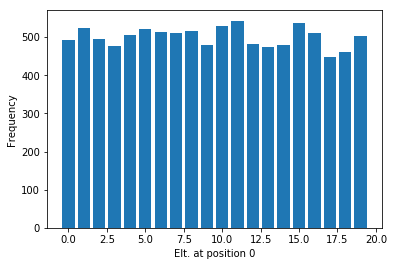

Chi Squared value = 24.204000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.188443 with test stat value = 24.204000
Chi squared test passed


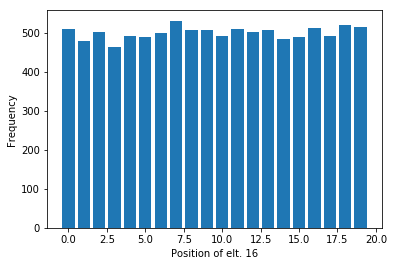

Expected value:  500.0
Chi Squared value = 9.344000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.967319 with test stat value = 9.344000
Chi squared test passed


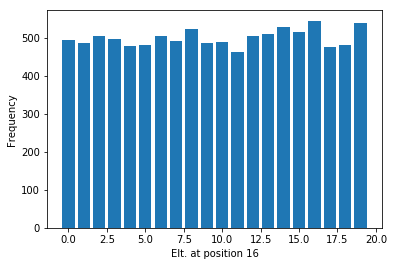

Chi Squared value = 18.116000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.514703 with test stat value = 18.116000
Chi squared test passed


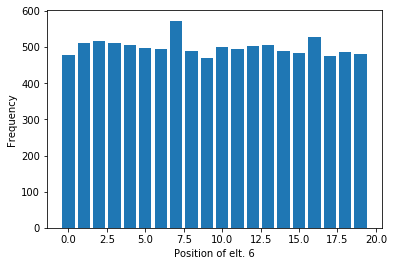

Expected value:  500.0
Chi Squared value = 19.716000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.411846 with test stat value = 19.716000
Chi squared test passed


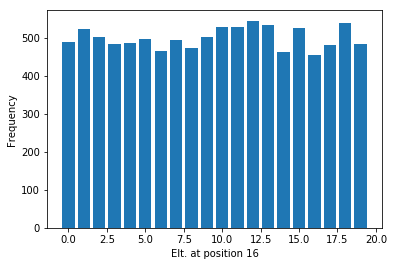

Chi Squared value = 27.968000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.084046 with test stat value = 27.968000
Chi squared test failed


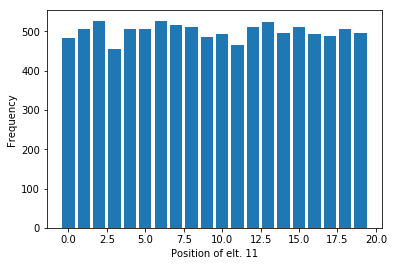

Expected value:  500.0
Chi Squared value = 13.456000 with 20 degrees of freedom, critical vaule = 30.143527
P-Value = 0.814431 with test stat value = 13.456000
Chi squared test passed


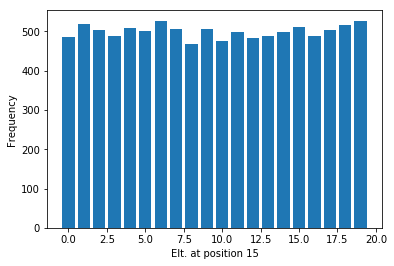

Chi Squared value = 9.604000 with 20 degrees of freedom, critical vaule = 27.203571
P-Value = 0.962048 with test stat value = 9.604000
Chi squared test passed


In [50]:
%matplotlib inline
## Begin statistical tests
import matplotlib.pyplot as plt
from scipy.stats import chi2
def whereDidElementEndUp(n, nTrials, elt):
    where = [0]*n
    for i in range(nTrials):
        a = list(range(n))
        b = shuffleArray(a)
        assert(len(b) == len(a))
        for k in range(n): 
            assert k in b, 'Fatal error: Your algorithm returned list: ' + str(b) + ' where element ' + k + ' does not exist anymore'
        # find where element n/2 ended up
        j = b.index(elt)
        where[j] = where[j] + 1
    exp = nTrials/n
    plt.figure("Where did elt. %d from original array end up in the shuffled array"%(elt))
    plt.bar(range(n), where)
    plt.xlabel('Position of elt. %d'%(elt))
    plt.ylabel('Frequency')
    plt.show()
    chiSquaredStat = 0.0
    print("Expected value: ", exp)
    critValue = chi2.isf(q=0.05, df = n-1)
    for i in range(n):
        chiSquaredStat = chiSquaredStat + (where[i] - exp)**2/exp
    #print("Chi Squared value = %f with %d degrees of freedom" %(chiSquaredStat, n) )
    print("Chi Squared value = %f with %d degrees of freedom, critical vaule = %lf" %(chiSquaredStat, n, critValue) )
    pval = 1 - chi2.cdf(chiSquaredStat, n-1)
    print("P-Value = %lf with test stat value = %lf" %(pval, chiSquaredStat))
    if (chiSquaredStat < critValue): 
        print("Chi squared test passed")
    else: 
        print("Chi squared test failed")
  

def whatElementEndedUpAtPos(n, nTrials, pos): 
    what = [0]*n
    for i in range(nTrials):
        a = list(range(n))
        b = shuffleArray(a)
        # find where element n/2 ended up
        j = b[pos]
        what[j] = what[j]+1
    plt.bar(range(n), what)
    plt.xlabel('Elt. at position %d'%(pos))
    plt.ylabel('Frequency')
    plt.show()
    chiSquaredStat = 0.0
    critValue = chi2.isf(q=0.1, df = n-1)
    exp = nTrials/n
    for i in range(n):
        chiSquaredStat = chiSquaredStat + (what[i] - exp)**2/exp
    print("Chi Squared value = %f with %d degrees of freedom, critical vaule = %lf" %(chiSquaredStat, n, critValue) )
    pval = 1 - chi2.cdf(chiSquaredStat, n-1)
    print("P-Value = %lf with test stat value = %lf" %(pval, chiSquaredStat))
    if (chiSquaredStat < critValue): 
        print("Chi squared test passed")
    else: 
        print("Chi squared test failed")

from random import randint

for l in range(10):
    whereDidElementEndUp(20, 10000, randint(0,19))
    whatElementEndedUpAtPos(20, 10000, randint(0,19))

       
##  End statistical tests

## Problem 1B  (5 Points)

Analyze the expected running time of your algorithm in 2(A) and expected number of random bits used?

## Answer (Expected Size: 5 lines).


The algorithm in 1(A) is similar to the quick sort algorithm where the array is partitioned around a pivot. Therefore, we can use the analysis for quick sort with random pivoting, and state that the expected running time is $nlog(n)$, for an array of size $n$ . The expected number of bits used is also  $nlog(n)$ .

## Problem 2  (20 points)


We shuffle the keys $1, \ldots, n$ in a random order and insert them into a binary search tree.
Throughout this problem, node $i$ refers to a node with key $i$. 
The _priority_ of a node is the rank order in which it is inserted. The very first key inserted has  priority $1$ and the very last key to be inserted having priority $n$.

In class, we showed that a node with key $i$ is the ancestor of a node with key $j$ if and only if $i$ has the lowest priority amongst all nodes $\{ i, \ldots, j\}$ (or $\{ j, \ldots, i\}$ if $j < i$).

(A) State and prove a condition on the priority for node with key $k$ to form a leaf in the tree. A node is a leaf if both its children are NIL.  __Hint:__ Think about the priority of the key $k$ in relation to those of keys $k-1$ and $k+1$. You may have to treat $k=1, n$ differently from $k = 2, \ldots, n-1$.

(B) What is the probability that node $k$ is a leaf? __Hint:__ Your answer should analyze nodes $1, n$ separately from nodes $2, \ldots, n-1$.

(C) Calculate the expected number of leaf nodes. Your answer should not involve asymptotic notations or bounds.


### Answer (Expected Size: 15 lines)


A node $k$ is a leaf if and only if it is not the ancestor of any other nodes.
Lets say that the priorities of the nodes be ${p_1, p_2, \cdots, p_{k-1}, p_k, p_{k+1}, \cdots, p_{n-1}, p_n}$, where $p_k$ is the priority corresponding to node $k$.

(A) <br/>
**Case 1**: $k = 2, 3, \cdots, n-1$ <br/>
Consider case when $p_{k-1} > p_{k+1}$. Node $k+1$ is instered into the tree, followed by node $k-1$, which becomes left child of node $k+1$. On inserting node $k$, it becomes the right child of node $k-1$. Now, note that all the other nodes with keys $1, 2, \cdots, k-2$ will always be inserted in the left subtree of node $k-1$, and all the other nodes with keys $k+2, k+3, \cdots, n$ will be insterted in the right subtree of node $k+1$. No node will ever be inserted under node $k$, which therefore becomes a leaf node.  <br/>
With a similar reasoing for case when $p_{k+1} > p_{k-1}$, we can arrive at the conclusion that node $k$ will be a leaf. <br/>
From the above, we can write that condition that for node $k$ to form a leaf, $p_k > p_{k-1}$ and $p_k > p_{k+1}$. <br/>

**Case 2**: $k = 1$ <br/>
For node $k$ to become a leaf, it has be inserted after node $k+1$, and no other node can be inserted under this node. The condition should be $p_k > p_{k+1}$ <br/>

**Case 3**: $k = n$ <br/>
For node $k$ to become a leaf, it has be inserted after node $k-1$ and no other node can be inserted under this node. The condition should be $p_k > p_{k-1}$

(B)<br/>
**Case 1**: Probability that node $k$ has higher priority that nodes $k-1$ and $k+1$ is $\frac{2!}{3!} = \frac{1}{3}$. Hence, the probability of node $k$ being a leaf is $\frac{1}{3}$. <br/>
**Case 2**: Probability that node $k$ has higher priority that nodes $k+1$ is $\frac{1!}{2!} = \frac{1}{2}$. Hence, the probability of node $k$ being a leaf is $\frac{1}{2}$. <br/>
**Case 3**: Similarly, the probability of node $k$ being a leaf is $\frac{1}{2}$. <br/>

(C) <br/>
Let $X$ be the random variable which counts the total number of leaves in the tree <br/>
$X = \sum_{k=1}^{n} X_k$ <br/>
Through linearity of expectation, we can say that expected number of leaf nodes is the sum of expected number of nodes from $ k = 1, 2, \cdots, n$ <br/>
$E[X] = \sum_{k=1}^{n} E[X_k]$ <br/>
$\implies E[X] = E[X_1] + \sum_{k=2}^{n-1} E[X_k] + E[X_n]$ <br/>
$\implies E[X] = \frac{1}{2} + \sum_{k=2}^{n-1} \frac{1}{3} + \frac{1}{2}$ <br/>
$\implies E[X] = 1 + \frac{n-2}{3}$ <br/>
$\implies E[X] = \frac{n+1}{3}$ <br/>